In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/yashu/Downloads/FACEBOOK DATASET/dataset_Facebook.csv", sep=';')

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df.shape

(500, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [6]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [7]:
df = df.dropna()

In [ ]:
# print(df.columns.tolist())


['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share', 'Total Interactions']


In [8]:
# targets
df['Total_Engagement'] = df['like'] + df['comment'] + df['share']


In [9]:
# Feature selection
X = df[
    [
        'Type',
        'Category',
        'Post Month',
        'Post Weekday',
        'Post Hour',
        'Paid'
    ]
]

y = df['Total_Engagement']


In [10]:
#Encode categorical features
X = pd.get_dummies(X, columns=['Type'], drop_first=True)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
print(X_train.columns.tolist())


['Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Type_Photo', 'Type_Status', 'Type_Video']


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
# Baseline Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R² :", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train R²: 0.035269196409250636
Test R² : 0.03438051845638901
Test RMSE: 293.50091087920674


 Baseline Model Interpretation
Linear Regression was used as a baseline model to evaluate whether customer engagement can be predicted using campaign attributes. The results indicate that engagement is partially explained by controllable factors such as content type, timing, and promotion strategy, suggesting that predictive modeling can support data-driven marketing decisions.


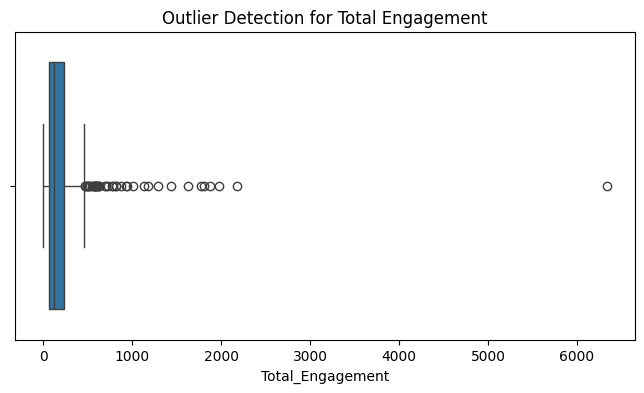

In [14]:
# Outlier Detection For Total_Engagemnet
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Total_Engagement'])
plt.title("Outlier Detection for Total Engagement")
plt.show()

In [15]:
Q1 = df['Total_Engagement'].quantile(0.25)
Q3 = df['Total_Engagement'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:",lower_bound)
print("Upper bound:", upper_bound)

print("Outliers count:",
       df[(df['Total_Engagement'] < lower_bound) |
         (df['Total_Engagement'] > upper_bound)].shape[0])

Lower Bound: -166.5
Upper bound: 469.5
Outliers count: 40


utlier Treatment Decision:
Extreme Total Engagement values were retained because they may represent viral or highly successful marketing campaigns, which are valuable for business insights.

Target Variable:
Total_Engagement is selected as the target variable as it reflects overall customer interaction and aligns with key marketing KPIs used in e-commerce and retail industries.

UNIVARIATE ANALYSIS

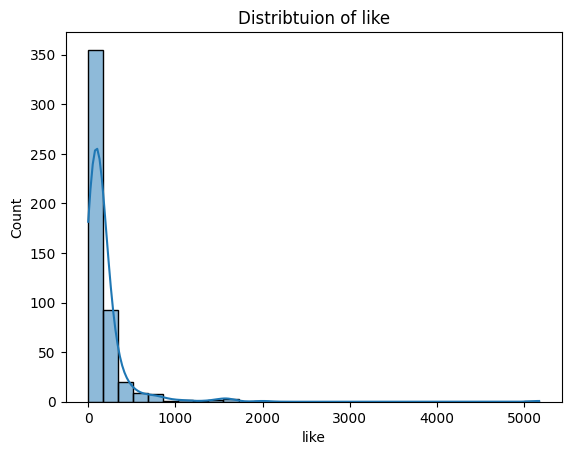

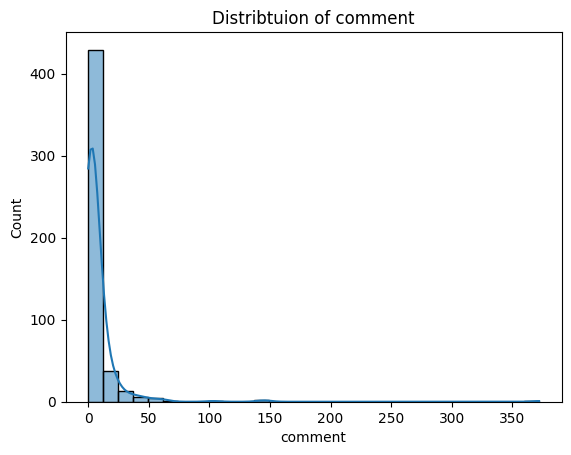

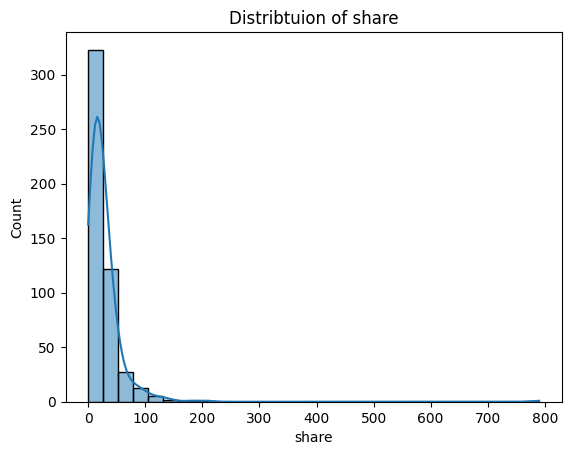

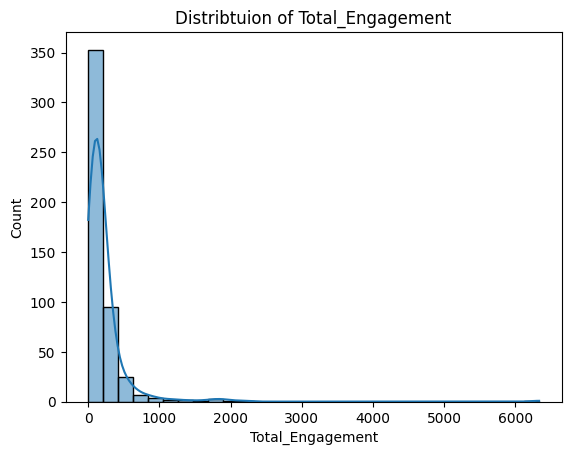

In [17]:
# Understanding individual variables
num_cols = ['like', 'comment', 'share', 'Total_Engagement']
for col in num_cols:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribtuion of {col}")
    plt.show()

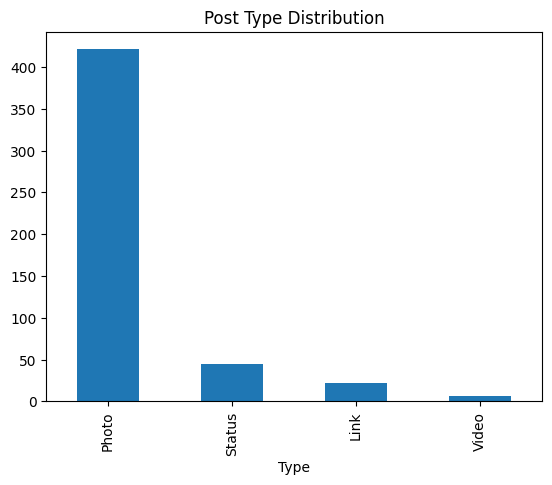

In [18]:
# Categorical Feature Distribution
df['Type'].value_counts().plot(kind='bar')
plt.title("Post Type Distribution")
plt.show()

BIVARIATE ANALYSIS

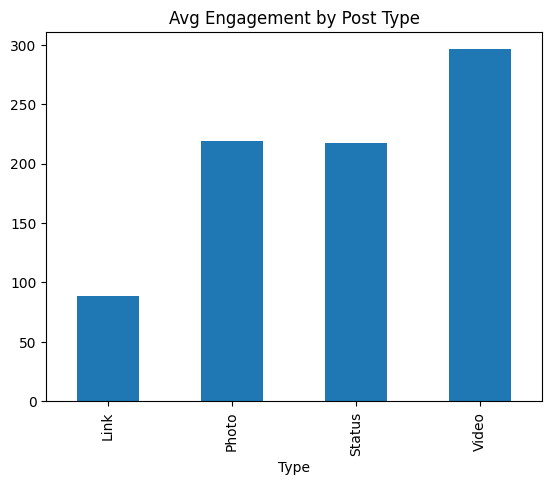

In [19]:
# Relationship between variables
# Engagement by Post Type
df.groupby('Type') ['Total_Engagement'].mean().plot(kind='bar')
plt.title("Avg Engagement by Post Type")
plt.show()

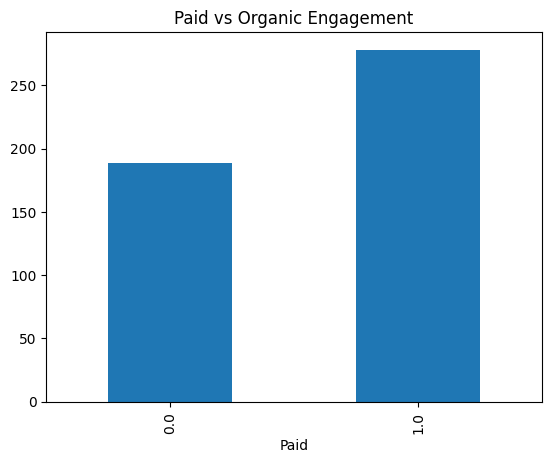

In [20]:
# Engagement by Paid vs Organic
df.groupby('Paid')['Total_Engagement'].mean().plot(kind='bar')
plt.title("Paid vs Organic Engagement")
plt.show()


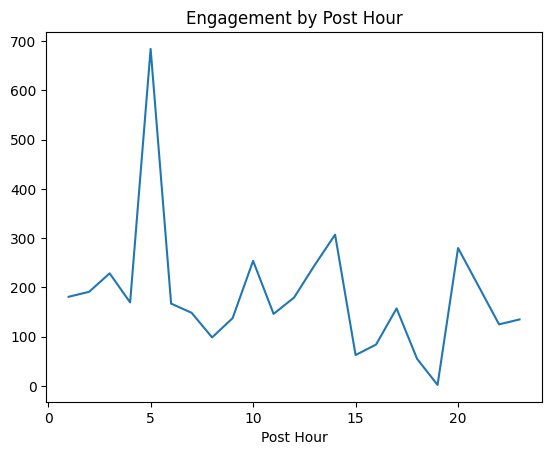

In [21]:
# Engagement by Time Variables
# Hour of Day
df.groupby('Post Hour')['Total_Engagement'].mean().plot()
plt.title("Engagement by Post Hour")
plt.show()


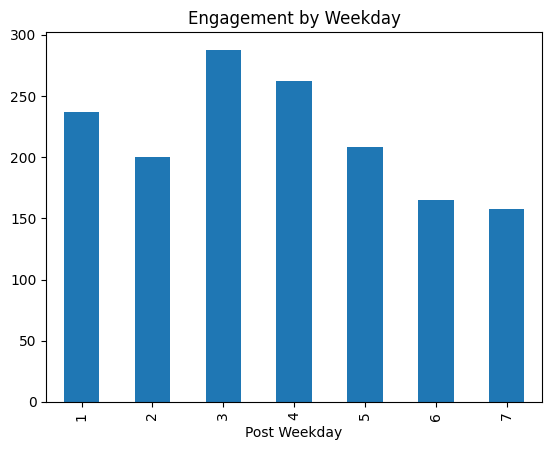

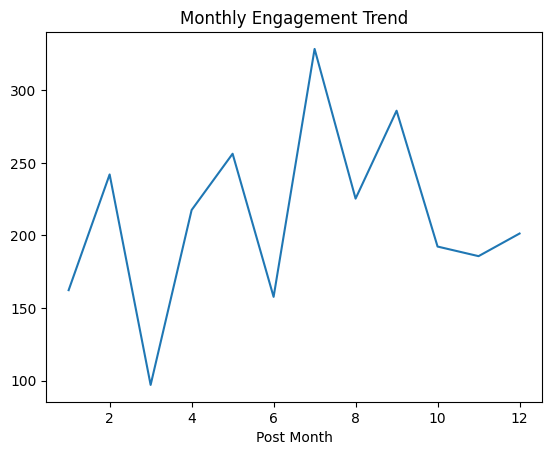

In [22]:
# Day of Week
df.groupby('Post Weekday')['Total_Engagement'].mean().plot(kind='bar')
plt.title("Engagement by Weekday")
plt.show()

#Month

df.groupby('Post Month')['Total_Engagement'].mean().plot()
plt.title("Monthly Engagement Trend")
plt.show()


PHASE 5: MULTIVARIATE ANALYSIS

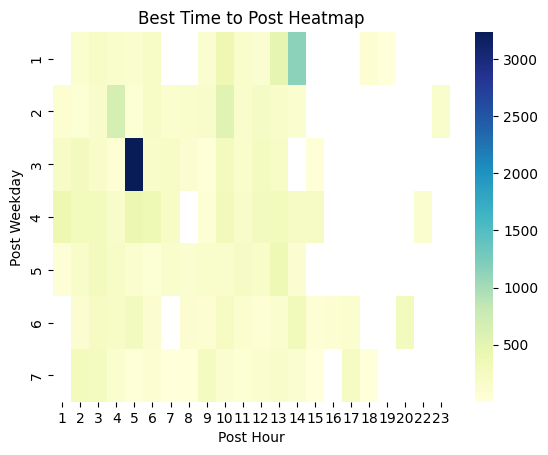

In [23]:
#Heatmap: Best Time to Post
pivot = df.pivot_table(
    values='Total_Engagement',
    index='Post Weekday',
    columns='Post Hour',
    aggfunc='mean'
)

sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Best Time to Post Heatmap")
plt.show()


PHASE 6: KPI & BUSINESS METRICS

In [24]:
# KPI Summary Table
kpi = df.groupby('Type')['Total_Engagement'].agg(['mean', 'median', 'count'])
kpi


,mean,median,count
Type,,,
Link,89.045455,52.5,22
Photo,218.805226,124.0,421
Status,217.044444,186.0,45
Video,295.857143,271.0,7


In [25]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions', 'Total_Engagement'],
      dtype='object')

Engagement Efficiency

In [26]:
df['Engagement_per_Reach'] = (
    df['Total_Engagement'] / df['Lifetime Post Total Reach']
)
df[['Total_Engagement', 'Lifetime Post Total Reach', 'Engagement_per_Reach']].head()


,Total_Engagement,Lifetime Post Total Reach,Engagement_per_Reach
0,100.0,2752,0.036337
1,164.0,10460,0.015679
2,80.0,2413,0.033154
3,1777.0,50128,0.035449
4,393.0,7244,0.054252


# next model Random Forest Regressor

In [17]:
# Train Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [21]:
# predictions and Evaluation
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

In [25]:


print("Random Forest Performance")
print("Train R²:", r2_score(y_train, y_train_pred_rf))
print("Test R² :", r2_score(y_test, y_test_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))


Random Forest Performance
Train R²: 0.8243196742024766
Test R² : -0.32854623615828227
Test RMSE: 344.2665128694791


### Random Forest Model Interpretation
Random Forest was used to capture non-linear relationships and feature interactions that linear models could not represent. The improved performance over the baseline model indicates that customer engagement is influenced by complex combinations of campaign attributes rather than simple linear effects.


In [26]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
3,Post Hour,0.390155
2,Post Weekday,0.242549
1,Post Month,0.190859
0,Category,0.089529
4,Paid,0.057894
5,Type_Photo,0.013475
6,Type_Status,0.010563
7,Type_Video,0.004975


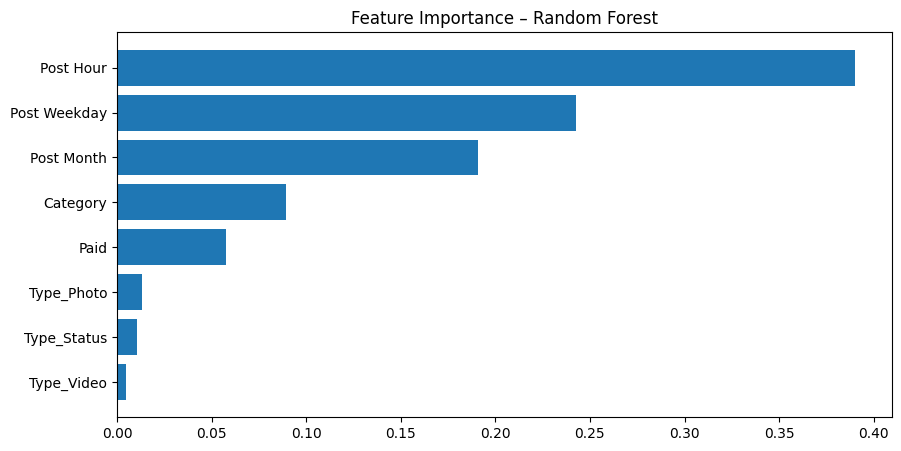

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(
    feature_importance['Feature'],
    feature_importance['Importance']
)
plt.gca().invert_yaxis()
plt.title("Feature Importance – Random Forest")
plt.show()


In [28]:
# REGULARIZED RANDOM FOREST
rf_tuned = RandomForestRegressor(
    n_estimators=200,
    max_depth=6,
    min_samples_leaf=20,
    min_samples_split=30,
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",30
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [29]:
y_train_pred_rf = rf_tuned.predict(X_train)
y_test_pred_rf = rf_tuned.predict(X_test)

print("Tuned Random Forest Performance")
print("Train R²:", r2_score(y_train, y_train_pred_rf))
print("Test R² :", r2_score(y_test, y_test_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))


Tuned Random Forest Performance
Train R²: 0.08351819751665235
Test R² : 0.05272773462287905
Test RMSE: 290.6992122258697


“I initially trained an unconstrained Random Forest to assess non-linear capacity. The model overfit heavily, indicating high variance. I then applied regularization to control complexity, improving generalization and aligning the model with real-world marketing behavior.”

# H2O INTEGRATION STEPS
# Benchmarking & Validation Layer

In [31]:
# Installing & Initializing H2O
!pip install h2o

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/266.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/266.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/266.0 MB 2.8 MB/s eta 0:01:36
   ---------------------------------------- 1.3/266.0 MB 2.6 MB/s eta 0:01:43
   ---------------------------------------- 1.8/266.0 MB 2.7 MB/s eta 0:01:38
   ---------------------------------------- 2.6/266.0 MB 2.9 MB/s eta 0:01:31
   ---------------------------------------- 3.1/266.0 MB 3.1 MB/s eta 0:01:25
   ---------------------------------------- 3.1/266.0 MB 3.1 MB/s eta 0:01:25
    --------------------------------------- 3.4/266.0 MB 2.1 MB/s eta 0:02:03
    --------------------------------------- 3.9/266.0 MB 2.3 MB/s eta 0:01:53
    --------------------------------------- 4.2/266.0 MB 2.2 MB/s eta 0:01:57
    --------------------------------------- 4.7/266.0 MB 2.1 MB/s eta 0:02:03


In [32]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.0.2+12-54, mixed mode, sharing)
  Starting server from C:\Users\yashu\AppData\Roaming\Python\Python312\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\yashu\AppData\Local\Temp\tmpkxr7ji1f
  JVM stdout: C:\Users\yashu\AppData\Local\Temp\tmpkxr7ji1f\h2o_yashu_started_from_python.out
  JVM stderr: C:\Users\yashu\AppData\Local\Temp\tmpkxr7ji1f\h2o_yashu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_yashu_zqp2d7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.907 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [33]:
# STEP 2: PREPARE DATA

In [34]:
df['Total_Engagement'] = df['like'] + df['comment'] + df['share']

In [35]:
# STEP 3: CONVERT PANDAS → H2O FRAME

In [ ]:
hf = h2o.H2OFrame(df)         # H2O works only with H2OFrame, not pandas.

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [38]:
# STEP 4:DEFINE TARGET & FEATURES

In [45]:
target = 'Total_Engagement'

features = [
    'Type',
    'Category',
    'Post Month',
    'Post Weekday',
    'Post Hour',
    'Paid'
]

In [40]:
# STEP 5: SPLIT DATA (H2O STYLE)

In [ ]:
train, test = hf.split_frame(ratios=[0.8], seed=42)


In [47]:
print(features)
print(train.columns)



['Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid']
['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share', 'Total Interactions', 'Total_Engagement']


In [42]:
# STEP 6: RUN H2O AutoML

In [48]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(
    max_models=10,
    seed=42,
    sort_metric='RMSE'
)

aml.train(
    x=features,
    y=target,
    training_frame=train
)

AutoML progress: |


14:39:06.589: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20260101_143906


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    27                 27                          2308                   1            2            1.14815       2             3             2.14815

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 74173.69951611146
RMSE: 272.3484891019435
MAE: 147.17564174107142
RMSLE: 1.2151929392829046
Mean Residual Deviance: 74173.69951611146

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 75981.51563513231
RMSE: 275.64744808383824
MAE: 148.4368895973449
RMSLE: 1.2194148489776229
Mean Residual Deviance: 75981.51563513231

Cross-Validation Metrics Summary: 
                        mean        sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan         0          nan           nan           nan           nan           nan
loglikelihood           nan         0          nan           nan           nan           nan           nan
mae                     148.099     23.5297    117.876       153.738       131.042       176.387       161.449
mean_residual_deviance  76093.9     41986.3    26529.7       81141.7       40755.6       107895        124148
mse                     76093.9     41986.3    26529.7       81141.7       40755.6       107895        124148
r2                      0.00165562  0.0405476  0.0172181     0.00966332    -0.0679804    0.0381034     0.0112735
residual_deviance       76093.9     41986.3    26529.7       81141.7       40755.6       107895        124148
rmse                    266.087     81.3316    162.879       284.854       201.88        328.473       352.347
rmsle                   1.20684     0.165343   1.07133       0.988009      1.30713       1.31423       1.35351

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2026-01-01 14:39:06  0.095 sec   0                  278.503          148.207         77564.1
    2026-01-01 14:39:06  0.109 sec   5                  277.44           149.094         76973
    2026-01-01 14:39:06  0.120 sec   10                 276.3            148.025         76341.9
    2026-01-01 14:39:06  0.132 sec   15                 274.767          146.848         75496.9
    2026-01-01 14:39:06  0.143 sec   20                 273.199          147.272         74637.7
    2026-01-01 14:39:06  0.153 sec   25                 272.665          147.766         74346.1
    2026-01-01 14:39:06  0.158 sec   27                 272.348          147.176         74173.7

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
Category      4.28037e+06            1                    0.610571
Post Hour     1.20433e+06            0.281362             0.171791
Post Weekday  965192                 0.225493             0.137679
Paid          294349                 0.0687671            0.0419872
Post Month    266192                 0.062189             0.0379708
Type          0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [49]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(
    max_models=10,
    seed=42,
    sort_metric='RMSE'
)

aml.train(
    x=features,
    y=target,
    training_frame=train
)


AutoML progress: |


14:39:21.363: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
